# Text Analysis

This notebook contains the analysis of a certain product on an e-commerce website. The dataset contains 4977 reviews.

## Contents

#### 1. Word Cloud Representation of the Dataset
#### 2. Word Frequencies
#### 3. Translation of Reviews to English
#### 4. Sentiment Analysis (with English dataset)
#### 5. Topic Modeling (with English dataset)
#### 6. Topic Modeling (with Turkish dataset)

In [5]:
# import libraries

import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from PIL import Image
import re

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel

from wordcloud import WordCloud

from googletrans import Translator

In [7]:
# import dataset

import pickle

f = open('2023-09-15_shampoo_reviews', 'rb')
reviews = pickle.load(f)
f.close()

In [9]:
reviews.head(5)

,84859
0,basariliii
1,urunu kullandim guzel tesekkurler
2,Çok güzel çok beğendim
3,saçımdaki egzamayı pul pul dökülmeleri kesti y...
4,"kepeğe çok etkili ve kaşıntıya da,mevsimsel eg..."


In [6]:
# import Turkish stopwords

sw = pd.read_csv('turkce-stop-words.txt', header=None)
sw

,0
0,a
1,acaba
2,altı
3,altmış
4,ama
...,...
282,yoksa
283,yu
284,yüz
285,zaten


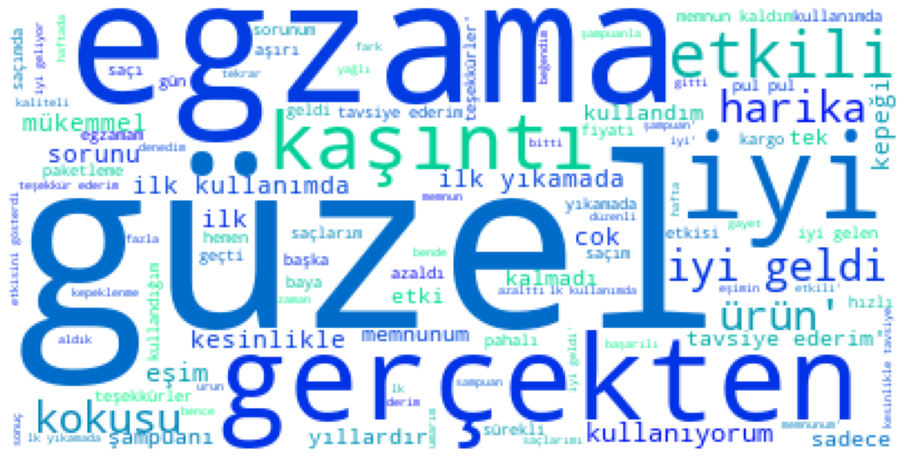

In [11]:
# lower reviews

rv_low = [item.lower() for item in reviews["84859"]]

# remove some "obvious" contextual words to get a clean wordcloud

dataset_specific_sws = ["ürün", "kepek", "şampuan", "aldım", "yok", "ürünü", "saç", "almıştım", "bi"]

# Create word cloud object

wordcloud_obj = WordCloud(max_words=100, 
                          stopwords=sw[0].to_list()+ dataset_specific_sws,
                          background_color="white",
                          colormap="winter",
                          random_state=42)

# Generate a word cloud 

wc = wordcloud_obj.generate(str(rv_low))

plt.figure(figsize=(16,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Word Frequency

In [12]:
punctuation_ = [".",",",":",";","!","'", "..","...", '"',"(",")","^","+","%","/","<",">"]

In [13]:
# Tokenization

# transform to string

rv_low_str = str(rv_low)

# tokenize

tokens = word_tokenize(rv_low_str)

# remove stopwords

tokens = [token for token in tokens if token not in sw[0].to_list()+dataset_specific_sws+punctuation_]

# make adjustments for some observed errors in the dataset

tokens = [token.replace("'","") for token in tokens]
tokens = [token.replace("i̇","i") for token in tokens]
tokens = [token.replace("cok","çok") for token in tokens]
tokens = [token.replace("guzel","güzel") for token in tokens]

In [14]:
# get frequency distribution

freq_dist = nltk.FreqDist(tokens)
freq_dist.most_common(100)

[('iyi', 1001),
 ('ilk', 762),
 ('güzel', 662),
 ('çok', 619),
 ('geldi', 464),
 ('tavsiye', 429),
 ('kullanıyorum', 428),
 ('egzama', 398),
 ('kullanımda', 393),
 ('ederim', 382),
 ('yıkamada', 357),
 ('memnun', 340),
 ('etkisini', 322),
 ('gerçekten', 320),
 ('etkili', 301),
 ('tek', 288),
 ('kaşıntı', 269),
 ('2', 247),
 ('kesinlikle', 239),
 ('işe', 229),
 ('harika', 218),
 ('hızlı', 212),
 ('ürün', 206),
 ('uzun', 204),
 ('teşekkürler', 202),
 ('memnunum', 197),
 ('gayet', 185),
 ('kokusu', 184),
 ('sorunu', 180),
 ('mükemmel', 179),
 ('eşim', 178),
 ('kullandığım', 177),
 ('paketleme', 171),
 ('kargo', 162),
 ('1', 162),
 ('etki', 159),
 ('pul', 154),
 ('kalmadı', 154),
 ('yıllardır', 151),
 ('sürekli', 151),
 ('teşekkür', 147),
 ('kaldım', 138),
 ('kepeği', 134),
 ('alın', 133),
 ('3', 133),
 ('kepek', 132),
 ('kullandım', 128),
 ('ürünü', 127),
 ('aşırı', 125),
 ('saçımda', 124),
 ('ediyorum', 122),
 ('hemen', 121),
 ('şampuanı', 120),
 ('geliyor', 120),
 ('pahalı', 115),
 ('sa

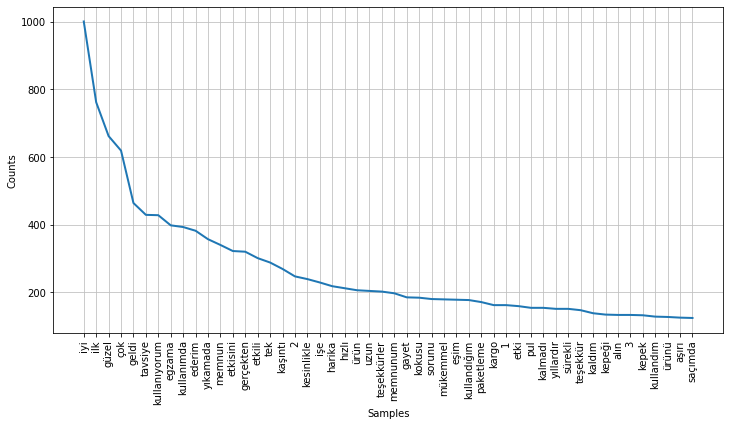

In [15]:
# visualize the frequency distribution

plt.figure(figsize=(12,6))
freq_dist.plot(50)
plt.show()

# Review Translation

In [259]:
from googletrans import Translator
translator = Translator()

In [258]:
rvs = reviews["84859"]

For "googletrans" library, "translate" function tends to give error due to unstable service from Google. Therefore, we translate the data in batches. Below, we create batches of 50 reviews. 

In [274]:
# Divide dataset into batches 

batch_size = 50
num_batches = len(rvs) // batch_size
num_iters_surplus = len(rvs) % batch_size
print("For a batch size of", batch_size,
     "run the translator", num_batches, "times.", 
      " \nRemainder is", num_iters_surplus, ". Make a batch with this many times.")


For a batch size of 50 run the translator 99 times.  
Remainder is 27 . Make a batch with this many times.


In [ ]:
# Translate dataset by batches of 50.
# Every time a batch is translated, add it to "rvs_en" list.

rvs_en = []

for i in range(num_batches):
    translator = Translator()
    first_rev_idx = i*batch_size
    last_rev_idx = (i+1)*batch_size
    temp_list = [translator.translate(rv, src='tr',dest='en').text for rv in rvs[first_rev_idx:last_rev_idx-1]]
    rvs_en += temp_list

    
temp_list = [translator.translate(rv, src='tr',dest='en').text for rv in rvs[-num_iters_surplus-1:-1]]
rvs_en += temp_list

In [276]:
# The largest # of reviews we managed to get translated is 1274

len(temp_list), len(rvs_en)

(49, 1274)

In [282]:
# Take a look

rvs_en[:10]

['Successful',
 'I used the product nice thanks',
 'Very good. I liked it so much',
 'I have been using the eczema in my hair exfoliating, I have been using it for about two months, I am very satisfied',
 'It is very effective for dandruff and itching and seasonal eczema 💚',
 'Fast shipping, price good👍🏻',
 'I bought it because my skin doctor suggested.I had wounds in my head and it was very good, I have been using it for 1 year.I got very firmly.',
 'The product destroys the eczema in the sheet.',
 'I could not see much of the benefit',
 'A great product.It was so good for my scalp']

In [284]:
rvs_en[-10:]

['A tremendous shampoo dandruff my problem disappeared and my hair was lightened officially but a little expensive',
 'The product came in a shed way. It was only wrapped in a bag with a balloon. It could be placed in a box.',
 'The packaging was nice.It was very good for my soil sheets.A very original product.I like it a lot.',
 'Branches are gone',
 'The shampoo that I always use is good to eczema instantly, my hair is yellow because it is a little color orange',
 'I am 25 years old and I have tried a lot of shampoo until now, but they would be the most satisfied shampoo themselves.My hair was lubricated in 1 day, I had a seasonal dandruff problem, my hair would stand weak and stick to my head, and all these complaints would go away.My hair is lubricated much later, I have no bran and my hair looks much fuller.I would definitely recommend I am very pleased.',
 'I wanted two, one of them had a little cover, a little flowing',
 "After washing, my hair bottoms had a sticky feeling and i

In [277]:
# Backup translated dataset
"""
f = open("shampoo-reviews-EN-1274", 'wb') 
pickle.dump(rvs_en, f)
f.close()
"""

# Sentiment Analysis

In [249]:
# Create analyzer object (from nltk lib)

analyzer = SentimentIntensityAnalyzer()

In [338]:
# Try out for a review

print("Sample Review Text:", rvs_en[0])
print()
print("Sentiment result:","\n\n",analyzer.polarity_scores(rvs_en[0]))

Sample Review Text: Successful

Sentiment result: 

 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}


In [308]:
# Create a dataframe to display all kind of scores for all samples

results = pd.DataFrame(columns=["review","compound","negative","neutral","positive"])

results["review"] = [rv for rv in rvs_en]
results["compound"] = [analyzer.polarity_scores(rv)["compound"] for rv in rvs_en]
results["negative"] = [analyzer.polarity_scores(rv)["neg"] for rv in rvs_en]
results["neutral"] = [analyzer.polarity_scores(rv)["neu"] for rv in rvs_en]
results["positive"] = [analyzer.polarity_scores(rv)["pos"] for rv in rvs_en]

results

,review,compound,negative,neutral,positive
0,Successful,0.5859,0.000,0.000,1.000
1,I used the product nice thanks,0.6908,0.000,0.345,0.655
2,Very good. I liked it so much,0.7408,0.000,0.389,0.611
3,I have been using the eczema in my hair exfoli...,0.4754,0.000,0.860,0.140
4,It is very effective for dandruff and itching ...,0.5256,0.000,0.747,0.253
...,...,...,...,...,...
1269,I am 25 years old and I have tried a lot of sh...,0.3567,0.156,0.671,0.173
1270,"I wanted two, one of them had a little cover, ...",0.0000,0.000,1.000,0.000
1271,"After washing, my hair bottoms had a sticky fe...",0.5984,0.000,0.847,0.153
1272,I haven't spent my eczema problem for years wi...,0.6369,0.085,0.696,0.218


In [312]:
# Check means of each score across all samples

results.mean(numeric_only=True)

compound    0.265778
negative    0.050160
neutral     0.716925
positive    0.232913
dtype: float64

In [321]:
print(results["compound"].argmax())
print(results["compound"].argmin())

1224
674


In [323]:
print("Review with the best compound score:\n\n", results.loc[1224,"review"])
print("\n\nReview with the worst compound score:\n\n",results.loc[674,"review"])

Review with the best compound score:

 There is no constant dandruff in my hair, but the changes between shampoos create dandruff, itching and dryness.Since I changed the shampoo, dandruff increased in my hair at a time, and Dercos was unbelievable.The smell is beautiful, I like it, it gives a clean hair feeling.And the itching in my hair decreased is quite a lot, but since I started using it, I don't expect it to have a slight decrease since I started to use it, I am happy that it has solved my dandruff problem, but as a student, these prosperity increased.When the need is appropriate, there is more demand when this price increase is due to the increase of the bottle.


Review with the worst compound score:

 I have been using it for 3 months.In general, it has reduced the dandruff, even more than half, but both my temples did not go to dandruff.Obviously I was a little sorry because I wanted it to show 100 %effect, but unfortunately he couldn't meet what I expected.But when my brothe

In [339]:
print(results["positive"].argmax())
print(results["negative"].argmax())

0
910


In [326]:
print("Review with the best positive score:\n\n", results.loc[0,"review"])
print("\n\nReview with the worst positive score:\n\n",results.loc[5,"review"])

Review with the best positive score:

 Successful


Review with the worst positive score:

 Fast shipping, price good👍🏻


In [331]:
print("Review with the greatest negative score:\n\n", results.loc[910,"review"])

Review with the greatest negative score:

 really destroyed eczema


In [336]:
results.loc[5,:]

review      Fast shipping, price good👍🏻
compound                            0.0
negative                            0.0
neutral                             1.0
positive                            0.0
Name: 5, dtype: object

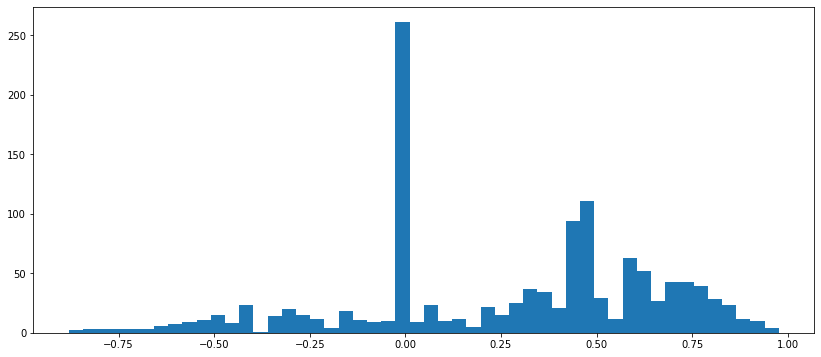

In [341]:
# Draw the histogram of compound score. Mostly postive reviews.

plt.figure(figsize=(14,6))
plt.hist(results['compound'], bins=50);

# Topic Modeling 
##### w/Translated Dataset

In [383]:
# The function in this cell is written by Megan Silvey.

# Text cleaning and tokenization using function

def text_processing(texts):
    #Remove numbers and alphanumerical words we don't need
    texts =  [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    #Tokenize & lowercase each word
    texts = [[word for word in text.lower().split()] for text in texts]
    #Stem each word
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text] for text in texts]
    #Remove stopwords
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]
    #Remove short words less than 3 letters in length
    texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]
    return texts

In [387]:
rvs_tokens_en = text_processing(results["review"])
rvs_tokens_en

[['successful'],
 ['used', 'product', 'nice', 'thanks'],
 ['good', 'liked', 'much'],
 ['using',
  'eczema',
  'hair',
  'exfoliating',
  'using',
  'two',
  'month',
  'satisfied'],
 ['effective', 'dandruff', 'itching', 'seasonal', 'eczema'],
 ['fast', 'shipping', 'price', 'good'],
 ['bought',
  'skin',
  'doctor',
  'suggested',
  'wound',
  'head',
  'good',
  'using',
  'year',
  'got',
  'firmly'],
 ['product', 'destroys', 'eczema', 'sheet'],
 ['could', 'see', 'much', 'benefit'],
 ['great', 'product', 'good', 'scalp'],
 ['beautiful', 'packaging'],
 ['product',
  'said',
  'delivered',
  'delivered',
  'address',
  'know',
  'let',
  'see',
  'happens',
  'call',
  'seller',
  'quickly',
  'shipping',
  'thanks',
  'recommend',
  'work',
  'bad',
  'cargo',
  'company',
  'make',
  'cent',
  'snow',
  'good',
  'job',
  'taking',
  'much',
  'would',
  'never',
  'recommend',
  'environment'],
 ['bran', 'decreased', 'great', 'product'],
 ['completely',
  'solved',
  'dandruff',
  'p

In [389]:
# Create a dictionary of words by using gensim library

dictionary = Dictionary(rvs_tokens_en)
len(dictionary)

1319

In [394]:
print(dictionary)
dictionary

Dictionary<1319 unique tokens: ['successful', 'nice', 'product', 'thanks', 'used']...>


In [391]:
# create corpus 

corpus = [dictionary.doc2bow(text) for text in rvs_tokens_en]

# each x in (x, y) represent the unique ID for a given word
corpus

[[(0, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)],
 [(8, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(5, 1), (19, 1), (20, 1), (21, 1)],
 [(5, 1),
  (14, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(2, 1), (8, 1), (31, 1), (32, 1)],
 [(7, 1), (33, 1), (34, 1), (35, 1)],
 [(2, 1), (5, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 1)],
 [(2, 1),
  (3, 1),
  (5, 1),
  (7, 1),
  (21, 1),
  (35, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(2, 1), (36, 1), (62, 1), (63, 1)],
 [(10, 1),
  (15, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(32, 1), (55, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)],
 [(1

In [395]:
# Create model

model = ldamodel.LdaModel(corpus,
                          id2word=dictionary, 
                          num_topics=6,
                          passes=20)

In [454]:
# Returns: Sequence with (topic_id, [(word, value), … ])

topics_ = model.show_topics()
topics_

[(0,
  '0.088*"product" + 0.024*"great" + 0.020*"month" + 0.019*"hair" + 0.018*"eczema" + 0.016*"use" + 0.015*"problem" + 0.015*"price" + 0.013*"using" + 0.013*"bran"'),
 (1,
  '0.062*"product" + 0.032*"satisfied" + 0.029*"packaging" + 0.024*"good" + 0.024*"thanks" + 0.023*"fast" + 0.020*"use" + 0.020*"bought" + 0.018*"nice" + 0.017*"used"'),
 (2,
  '0.083*"good" + 0.039*"eczema" + 0.036*"hair" + 0.032*"shampoo" + 0.026*"dandruff" + 0.026*"itching" + 0.016*"scalp" + 0.016*"dermatitis" + 0.015*"seborrheic" + 0.012*"problem"'),
 (3,
  '0.040*"dandruff" + 0.033*"use" + 0.021*"one" + 0.020*"product" + 0.019*"really" + 0.019*"eczema" + 0.018*"shampoo" + 0.017*"beautiful" + 0.016*"hair" + 0.016*"bought"'),
 (4,
  '0.058*"dandruff" + 0.046*"problem" + 0.044*"use" + 0.038*"shampoo" + 0.029*"first" + 0.028*"hair" + 0.027*"eczema" + 0.018*"product" + 0.017*"washing" + 0.016*"really"'),
 (5,
  '0.039*"use" + 0.030*"using" + 0.030*"product" + 0.026*"hair" + 0.026*"effect" + 0.026*"time" + 0.023*"b

In [456]:
topic_df = pd.DataFrame(columns=range(6))

for topic in topics_:
    topic_temp = topic[1].split('" + ')
    topic_temp = [elem[7:] for elem in topic_temp]
    topic_temp[-1] = topic_temp[-1][:-1]
    topic_df[topic[0]] = topic_temp
    
topic_df.T

,0,1,2,3,4,5,6,7,8,9
0,product,great,month,hair,eczema,use,problem,price,using,bran
1,product,satisfied,packaging,good,thanks,fast,use,bought,nice,used
2,good,eczema,hair,shampoo,dandruff,itching,scalp,dermatitis,seborrheic,problem
3,dandruff,use,one,product,really,eczema,shampoo,beautiful,hair,bought
4,dandruff,problem,use,shampoo,first,hair,eczema,product,washing,really
5,use,using,product,hair,effect,time,bought,first,shampoo,long


In [463]:
# let's name each topic

topic_df.columns =  ["price",
                    "packaging",
                    "health concern",
                    "general",
                    "first wash",
                    "first time efficacy"]

In [465]:
topic_df.T

,0,1,2,3,4,5,6,7,8,9
price,product,great,month,hair,eczema,use,problem,price,using,bran
packaging,product,satisfied,packaging,good,thanks,fast,use,bought,nice,used
health concern,good,eczema,hair,shampoo,dandruff,itching,scalp,dermatitis,seborrheic,problem
general,dandruff,use,one,product,really,eczema,shampoo,beautiful,hair,bought
first wash,dandruff,problem,use,shampoo,first,hair,eczema,product,washing,really
first time efficacy,use,using,product,hair,effect,time,bought,first,shampoo,long


In [406]:
# The probability for each word in each topic, shape (num_topics, vocabulary_size).
model.get_topics()

array([[1.15523208e-02, 1.19173797e-02, 8.81479010e-02, ...,
        1.02135884e-04, 1.02135891e-04, 1.02136102e-04],
       [1.13275644e-04, 1.80980228e-02, 6.17616624e-02, ...,
        1.13268841e-04, 1.13268841e-04, 1.13269103e-04],
       [9.35604839e-05, 1.40434073e-04, 3.13392188e-03, ...,
        9.31374743e-05, 9.31374743e-05, 9.31376635e-05],
       [1.61882577e-04, 1.90833889e-04, 1.96006428e-02, ...,
        1.28759202e-04, 1.28759217e-04, 1.28759581e-04],
       [8.81029060e-04, 4.68567619e-03, 1.78984292e-02, ...,
        4.28187021e-04, 4.28187021e-04, 6.11937430e-05],
       [7.89548794e-05, 2.95549515e-03, 2.95307338e-02, ...,
        6.42934392e-05, 6.42934392e-05, 4.49874758e-04]], dtype=float32)

In [ ]:
"""
All Parameters of LDAModel: 

LdaModel(corpus=None, 
         num_topics=100, 
         id2word=None, 
         distributed=False, 
         chunksize=2000, 
         passes=1, 
         update_every=1, 
         alpha='symmetric', 
         eta=None, 
         decay=0.5, 
         offset=1.0, 
         eval_every=10, 
         iterations=50, 
         gamma_threshold=0.001, 
         minimum_probability=0.01, 
         random_state=None, 
         ns_conf=None, 
         minimum_phi_value=0.01, 
         per_word_topics=False, 
         callbacks=None)
"""

# Topic Modeling 
#### with Turkish -original- dataset

In [479]:
# Break each sentence into its words

rv_sentence_tokenized=[]

for elem in rv_low:
    elem = elem.split(" ")
    rv_sentence_tokenized.append(elem)

In [782]:
rv_sentence_tokenized

[['basariliii'],
 ['urunu', 'kullandim', 'guzel', 'tesekkurler'],
 ['çok', 'güzel', 'çok', 'beğendim'],
 ['saçımdaki',
  'egzamayı',
  'pul',
  'pul',
  'dökülmeleri',
  'kesti',
  'yaklaşık',
  'iki',
  'aydır',
  'kullanıyorum',
  'çok',
  'memnunum'],
 ['kepeğe',
  'çok',
  'etkili',
  've',
  'kaşıntıya',
  'da,mevsimsel',
  'egzamaya',
  'da',
  '💚'],
 ['hızlı', 'kargo,', 'fiyat', 'iyi👍🏻'],
 ['cilt',
  'doktorum',
  'önerdiği',
  'için',
  'almıştım.',
  'kafamda',
  'yaralar',
  'çıkıyordu',
  've',
  'çok',
  'iyi',
  'geldi',
  '1',
  'yıldır',
  'kullanıyorum.',
  'çok',
  'sağlam',
  'elime',
  'ulaştı.'],
 ['ürün', 'sactaki', 'egzamalari', 'yok', 'ediyor.muhtesem..fiyata', 'değer.'],
 ['çok', 'faydasını', 'göremedim'],
 ['harika',
  'bir',
  'ürün.',
  'saç',
  'derime',
  'o',
  'kadar',
  'iyi',
  'geldi',
  'ki'],
 ['güzel', 'paketleme'],
 ['ürün',
  'teslim',
  'edildi',
  'deniyor',
  'ama',
  'adresime',
  'teslim',
  'edilmedi,',
  'kim',
  'bilir',
  'nerede.',
  'ta

In [522]:
# Remove Turkish stopwords

rv_sentence_wo_sw = []

for elem in rv_sentence_tokenized:
    elem = [word for word in elem if word not in sw[0].to_list()]
    rv_sentence_wo_sw.append(elem)

In [533]:
# Update punctuation list

punctuation_ += ["[", "]", " "]

In [762]:
# Remove punctuation

rv_sentence_wo_punc = []

for elem in rv_sentence_wo_sw:
    for punc_ in punctuation_:
        elem = [word.replace(punc_,'') for word in elem]
    rv_sentence_wo_punc.append(elem)
    
rv_sentence_wo_punc

[['basariliii'],
 ['urunu', 'kullandim', 'guzel', 'tesekkurler'],
 ['güzel', 'beğendim'],
 ['saçımdaki',
  'egzamayı',
  'pul',
  'pul',
  'dökülmeleri',
  'kesti',
  'yaklaşık',
  'aydır',
  'kullanıyorum',
  'memnunum'],
 ['kepeğe', 'etkili', 'kaşıntıya', 'damevsimsel', 'egzamaya', '💚'],
 ['hızlı', 'kargo', 'fiyat', 'iyi👍🏻'],
 ['cilt',
  'doktorum',
  'önerdiği',
  'almıştım',
  'kafamda',
  'yaralar',
  'çıkıyordu',
  'iyi',
  'geldi',
  '1',
  'yıldır',
  'kullanıyorum',
  'sağlam',
  'elime',
  'ulaştı'],
 ['ürün', 'sactaki', 'egzamalari', 'yok', 'ediyormuhtesemfiyata', 'değer'],
 ['faydasını', 'göremedim'],
 ['harika', 'ürün', 'saç', 'derime', 'iyi', 'geldi'],
 ['güzel', 'paketleme'],
 ['ürün',
  'teslim',
  'edildi',
  'deniyor',
  'adresime',
  'teslim',
  'edilmedi',
  'bilir',
  'nerede',
  'talep',
  'oluşturduk',
  'bakalım',
  'olacak',
  'buradan',
  'satıcıya',
  'sesleniyorum',
  'hızlı',
  'kargoya',
  'verdiniz',
  'teşekkürler',
  '3-5',
  'kuruş',
  'kar',
  'yapaca

In [763]:
# Replace common typos

for i in range(len(rv_sentence_wo_punc)):
    for j in range(len(rv_sentence_wo_punc[i])):
        rv_sentence_wo_punc[i][j] = rv_sentence_wo_punc[i][j].replace("i̇","i")
        rv_sentence_wo_punc[i][j] = rv_sentence_wo_punc[i][j].replace("cok","çok")     
        
# Remove ''

for elem in rv_sentence_wo_punc:
    if str('') in elem:
        elem.remove('')

In [752]:
# Create dictionary

dictionary = Dictionary(rv_sentence_wo_punc)
len(dictionary)

9313

In [590]:
# Create model

corpus = [dictionary.doc2bow(text) for text in rv_sentence_wo_punc]

model = ldamodel.LdaModel(corpus,
                          id2word=dictionary, 
                          num_topics=6,
                          passes=20)

In [591]:
# Get topics

topics_ = model.show_topics()
topics_

[(0,
  '0.019*"şampuan" + 0.018*"kepek" + 0.016*"saç" + 0.016*"iyi" + 0.013*"geldi" + 0.012*"aldım" + 0.011*"ürün" + 0.009*"egzama" + 0.009*"" + 0.007*"yok"'),
 (1,
  '0.024*"işe" + 0.017*"saç" + 0.017*"iyi" + 0.012*"güzel" + 0.010*"yarıyor" + 0.010*"geldi" + 0.010*"aldım" + 0.009*"yeni" + 0.008*"kullanmaya" + 0.007*"faydasını"'),
 (2,
  '0.070*"ürün" + 0.044*"güzel" + 0.028*"ederim" + 0.024*"hızlı" + 0.020*"tavsiye" + 0.016*"teşekkürler" + 0.016*"kargo" + 0.015*"iyi" + 0.015*"geldi" + 0.015*"paketleme"'),
 (3,
  '0.024*"çok" + 0.019*"kepek" + 0.014*"iyi" + 0.012*"kullanıyorum" + 0.011*"urun" + 0.011*"sampuan" + 0.008*"başarılı" + 0.008*"icin" + 0.008*"egzama" + 0.007*"guzel"'),
 (4,
  '0.041*"ilk" + 0.023*"kullanımda" + 0.021*"kepek" + 0.020*"etkisini" + 0.019*"ürün" + 0.018*"yıkamada" + 0.017*"memnun" + 0.014*"gerçekten" + 0.011*"etkili" + 0.010*"aldım"'),
 (5,
  '0.050*"iyi" + 0.030*"şampuan" + 0.024*"tek" + 0.017*"geliyor" + 0.014*"gelen" + 0.013*"tavsiye" + 0.008*"kepeğe" + 0.008*

In [592]:
# Get topics

topic_df = pd.DataFrame(columns=range(6))

for topic in topics_:
    topic_temp = topic[1].split('" + ')
    topic_temp = [elem[7:] for elem in topic_temp]
    topic_temp[-1] = topic_temp[-1][:-1]
    topic_df[topic[0]] = topic_temp
    
topic_df.T

,0,1,2,3,4,5,6,7,8,9
0,şampuan,kepek,saç,iyi,geldi,aldım,ürün,egzama,,yok
1,işe,saç,iyi,güzel,yarıyor,geldi,aldım,yeni,kullanmaya,faydasını
2,ürün,güzel,ederim,hızlı,tavsiye,teşekkürler,kargo,iyi,geldi,paketleme
3,çok,kepek,iyi,kullanıyorum,urun,sampuan,başarılı,icin,egzama,guzel
4,ilk,kullanımda,kepek,etkisini,ürün,yıkamada,memnun,gerçekten,etkili,aldım
5,iyi,şampuan,tek,geliyor,gelen,tavsiye,kepeğe,harika,alıyorum,kullanıyorum


## Topic Modeling with Turkish Dataset, Lemmatization Applied

In [687]:
# Note common words' root

lemm_tr = {"almak" : ["aldım",
                        "alıyorum", 
                        "almıştım",
                        "aldı",
                        "aldık",
                        "alıyoruz", 
                        "alacağız",
                        "alacağım",
                        "alacağız",
                        "almıştık"],
            "gelmek": ["geldi", "geliyor", "gelmişti"] + 7*[0],
            "göstermek": ["gösterdi", "göstermişti","gösterdiğini",
                          "gösterir"] + 6*[0],
            "görmek": ["gördüm","gördük","gördü","gördüğümüz"]+ 6*[0],
            "etmek": ["ederim", "etti","ederiz", "ediyor", 
                      "ediyoruz", "ederiz", "ettim"]+ 3*[0],
            "kullanmak": ["kullandım", "kullandı","kullandık",
                          "kullanıyor","kullanıyordu",
                         "kullandim","kullanıyorum","kullanıyorum",
                         "kullaniyor"]+ 1*[0],
            "etki": ["etkisi","etkili","etkisini","etkileyici"]+ 6*[0],
            "kullanım": ["kullanımda","kullanımını","kullanıma"]+ 7*[0],
            "şampuan": ["şampuanı","şampuanım","şampuana","sampuan"]+ 6*[0],
            "ürün": ["urun", "urunu", "urune", "urunden", "urunle",
                        "ürünü", "ürüne", "üründen", "ürünle"]+ 1*[0],
            "fiyat": ["fiyata","fiyatı","fiyatlı"]+ 7*[0],
            "güzel": ["guzel"] + 9*[0],
            "kepek": ["kepegi", "kepeği",
                     "kepeğe", "kepege",
                     "kepekten"] + 5*[0],
        }

In [689]:
# df
lemm_df = pd.DataFrame(lemm_tr)
lemm_df

,almak,gelmek,göstermek,görmek,etmek,kullanmak,etki,kullanım,şampuan,ürün,fiyat,güzel,kepek
0,aldım,geldi,gösterdi,gördüm,ederim,kullandım,etkisi,kullanımda,şampuanı,urun,fiyata,guzel,kepegi
1,alıyorum,geliyor,göstermişti,gördük,etti,kullandı,etkili,kullanımını,şampuanım,urunu,fiyatı,0,kepeği
2,almıştım,gelmişti,gösterdiğini,gördü,ederiz,kullandık,etkisini,kullanıma,şampuana,urune,fiyatlı,0,kepeğe
3,aldı,0,gösterir,gördüğümüz,ediyor,kullanıyor,etkileyici,0,sampuan,urunden,0,0,kepege
4,aldık,0,0,0,ediyoruz,kullanıyordu,0,0,0,urunle,0,0,kepekten
5,alıyoruz,0,0,0,ederiz,kullandim,0,0,0,ürünü,0,0,0
6,alacağız,0,0,0,ettim,kullanıyorum,0,0,0,ürüne,0,0,0
7,alacağım,0,0,0,0,kullanıyorum,0,0,0,üründen,0,0,0
8,alacağız,0,0,0,0,kullaniyor,0,0,0,ürünle,0,0,0
9,almıştık,0,0,0,0,0,0,0,0,0,0,0,0


In [765]:
# Replace original words with lemmatized versions

lemm_10 = lemm_array.reshape(-1,10)
lemm_array = np.array(lemm_df.T).reshape(-1,1)

for i in range(len(rv_sentence_wo_punc)):
    for j in range(len(rv_sentence_wo_punc[i])):
        kw = rv_sentence_wo_punc[i][j]
        if kw in lemm_array:
            emb= []
            for elem in lemm_10:        
                if kw in elem:
                    emb.append(True)
                else:
                    emb.append(False)
            idx = emb.index(True)            
            rv_sentence_wo_punc[i][j] = lemm_df.columns[idx]

In [766]:
# check
rv_sentence_wo_punc

[['basariliii'],
 ['ürün', 'kullanmak', 'güzel', 'tesekkurler'],
 ['güzel', 'beğendim'],
 ['saçımdaki',
  'egzamayı',
  'pul',
  'pul',
  'dökülmeleri',
  'kesti',
  'yaklaşık',
  'aydır',
  'kullanmak',
  'memnunum'],
 ['kepek', 'etki', 'kaşıntıya', 'damevsimsel', 'egzamaya', '💚'],
 ['hızlı', 'kargo', 'fiyat', 'iyi👍🏻'],
 ['cilt',
  'doktorum',
  'önerdiği',
  'almak',
  'kafamda',
  'yaralar',
  'çıkıyordu',
  'iyi',
  'gelmek',
  '1',
  'yıldır',
  'kullanmak',
  'sağlam',
  'elime',
  'ulaştı'],
 ['ürün', 'sactaki', 'egzamalari', 'yok', 'ediyormuhtesemfiyata', 'değer'],
 ['faydasını', 'göremedim'],
 ['harika', 'ürün', 'saç', 'derime', 'iyi', 'gelmek'],
 ['güzel', 'paketleme'],
 ['ürün',
  'teslim',
  'edildi',
  'deniyor',
  'adresime',
  'teslim',
  'edilmedi',
  'bilir',
  'nerede',
  'talep',
  'oluşturduk',
  'bakalım',
  'olacak',
  'buradan',
  'satıcıya',
  'sesleniyorum',
  'hızlı',
  'kargoya',
  'verdiniz',
  'teşekkürler',
  '3-5',
  'kuruş',
  'kar',
  'yapacağım',
  'kö

In [767]:
# Create gensim dict

dictionary2 = Dictionary(rv_sentence_wo_punc)
len(dictionary2)

9256

In [772]:
# model

corpus = [dictionary2.doc2bow(text) for text in rv_sentence_wo_punc]

model = ldamodel.LdaModel(corpus,
                          id2word=dictionary2, 
                          num_topics=4,
                          passes=20)

In [773]:
topics_lemmatized = model.show_topics()
topics_lemmatized

[(0,
  '0.034*"etki" + 0.032*"ilk" + 0.024*"kullanım" + 0.012*"ürün" + 0.012*"işe" + 0.012*"kullanmak" + 0.011*"görmek" + 0.010*"pul" + 0.010*"kepek" + 0.010*"almak"'),
 (1,
  '0.055*"ürün" + 0.033*"iyi" + 0.032*"güzel" + 0.025*"almak" + 0.022*"gelmek" + 0.019*"şampuan" + 0.017*"kullanmak" + 0.013*"hızlı" + 0.012*"kepek" + 0.011*"memnun"'),
 (2,
  '0.032*"kepek" + 0.014*"etki" + 0.013*"şampuan" + 0.013*"almak" + 0.013*"ilk" + 0.011*"ürün" + 0.011*"kullanmak" + 0.010*"saç" + 0.009*"yıkamada" + 0.009*"2"'),
 (3,
  '0.030*"tavsiye" + 0.024*"etmek" + 0.023*"iyi" + 0.020*"kepek" + 0.019*"şampuan" + 0.018*"saç" + 0.018*"ürün" + 0.011*"egzama" + 0.011*"kesinlikle" + 0.009*"gelmek"')]

In [780]:
# Display the most important 3 terms for each topic


topic_df2 = pd.DataFrame(columns=range(4))

for topic in topics_lemmatized:
    topic_temp = topic[1].split('" + ')
    topic_temp = [elem[7:] for elem in topic_temp]
    topic_temp[-1] = topic_temp[-1][:-1]
    topic_df2[topic[0]] = topic_temp
    
topic_df2.iloc[:3,:].T

,0,1,2
0,etki,ilk,kullanım
1,ürün,iyi,güzel
2,kepek,etki,şampuan
3,tavsiye,etmek,iyi


### .